In [49]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#dataset from kaggle
us_accidents = pd.read_csv('/Users/lyndon/Documents/GitHub/dataset0/US_Accidents_Dec21_updated.csv')



#removal of unwanted columns
us_acc_drop= us_accidents.drop(['ID', 'Sunrise_Sunset', 'Wind_Direction', 'Pressure(in)', 'Precipitation(in)', 'Crossing', 'Stop', 'Wind_Chill(F)', 'Amenity', 'Bump', 'Give_Way', 'Railway', 'Roundabout', 'Station', 'Turning_Loop', 'Weather_Timestamp', 'Airport_Code', 'Junction', 'Traffic_Calming', 'No_Exit', 'Traffic_Signal',  'Start_Time', 'End_Time', 'End_Lat', 'End_Lng', 'City', 'County', 'State', 'Side','Wind_Speed(mph)',  'Description', 'Street', 'Number', 'Country', 'Distance(mi)', 'Astronomical_Twilight', 'Nautical_Twilight', 'Civil_Twilight'], axis = 1)

#removal of rows with na value
us_acc_drop_na = us_acc_drop.dropna()






In [55]:
#changes Temperature(F) column from float to int
us_acc_drop_na['Temperature(F)'] = us_acc_drop_na['Temperature(F)'].astype(pd.Int64Dtype())

/var/folders/vq/ytbzyvqd3k1fq6t0cv5sh6j40000gp/T/ipykernel_11310/2706179519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_acc_drop_na['Temperature(F)'] = us_acc_drop_na['Temperature(F)'].astype(pd.Int64Dtype())


In [56]:
us_acc_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752816 entries, 0 to 2845341
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   Zipcode            object 
 4   Timezone           object 
 5   Temperature(F)     Int64  
 6   Humidity(%)        float64
 7   Visibility(mi)     float64
 8   Weather_Condition  object 
dtypes: Int64(1), float64(4), int64(1), object(3)
memory usage: 212.6+ MB


In [57]:
us_acc_drop_na.head()


,Severity,Start_Lat,Start_Lng,Zipcode,Timezone,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition
0,3,40.108910,-83.092860,43017,US/Eastern,42,58.0,10.0,Light Rain
1,2,39.865420,-84.062800,45424,US/Eastern,36,91.0,10.0,Light Rain
2,2,39.102660,-84.524680,45203,US/Eastern,36,97.0,10.0,Overcast
3,2,41.062130,-81.537840,44311,US/Eastern,39,55.0,10.0,Overcast
4,3,39.172393,-84.492792,45217,US/Eastern,37,93.0,10.0,Light Rain


In [30]:
#What is the ......? What do you want to know?

In [65]:
us_acc_drop_na['Temperature(F)'].value_counts()

73     75419
75     70531
64     67883
66     66164
77     63574
       ...  
144        1
136        1
156        1
127        1
168        1
Name: Temperature(F), Length: 158, dtype: Int64

In [60]:
#At what temperature has the highest amount of crashes? 73 degrees, then 75, 64, 66 and 77

us_acc_drop_na_vc = us_acc_drop.groupby(['Temperature(F)', 'Severity'])

#us_acc_drop_vc['Severity'].value_counts()

In [40]:
us_acc_drop.groupby('Severity')['Severity'].agg('min', 'max'
                                               )

Severity
1    1
2    2
3    3
4    4
Name: Severity, dtype: int64

In [7]:
us_acc_drop_na['Timezone'].value_counts()

US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: Timezone, dtype: int64

In [8]:
us_acc_drop['Zipcode'].value_counts()

91761         6162
33186         5248
92407         4528
92507         4527
91706         4471
              ... 
93306-6165       1
94518-3315       1
29605-5865       1
29048-9475       1
95993-9513       1
Name: Zipcode, Length: 363085, dtype: int64

In [58]:

us_acc_drop_na.sort_values('Zipcode')

,Severity,Start_Lat,Start_Lng,Zipcode,Timezone,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition
141510,2,42.07259,-72.63541,01001,US/Eastern,32,75.0,10.0,Mostly Cloudy
2282164,1,42.08021,-72.58942,01001,US/Eastern,47,66.0,10.0,Fair
209319,3,42.07482,-72.62653,01001,US/Eastern,62,84.0,10.0,Clear
2282158,1,42.08021,-72.58942,01001,US/Eastern,47,66.0,10.0,Fair
2158094,3,42.07259,-72.63541,01001,US/Eastern,79,28.0,10.0,Fair
...,...,...,...,...,...,...,...,...,...
2813323,2,45.99826,-117.27844,99401-9712,US/Pacific,76,35.0,10.0,Fair
2520615,4,45.99826,-117.27844,99401-9712,US/Pacific,28,81.0,0.8,Light Snow
2520552,4,45.99826,-117.27844,99401-9712,US/Pacific,25,81.0,10.0,Overcast
2331314,2,45.99826,-117.27844,99401-9712,US/Pacific,37,89.0,8.0,Light Rain


In [9]:
us_acc_drop.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.776068e+06,2.772250e+06,2.774796e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,6.179356e+01,6.436545e+01,9.099391e+00
std,4.787216e-01,5.363797e+00,1.831782e+01,1.862263e+01,2.287457e+01,2.717546e+00
min,1.000000e+00,2.456603e+01,-1.245481e+02,-8.900000e+01,1.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,5.000000e+01,4.800000e+01,1.000000e+01
50%,2.000000e+00,3.609861e+01,-9.241808e+01,6.400000e+01,6.700000e+01,1.000000e+01
75%,2.000000e+00,4.016024e+01,-8.037243e+01,7.600000e+01,8.300000e+01,1.000000e+01
max,4.000000e+00,4.900058e+01,-6.711317e+01,1.960000e+02,1.000000e+02,1.400000e+02


array([[<AxesSubplot:title={'center':'Severity'}>,
        <AxesSubplot:title={'center':'Start_Lat'}>],
       [<AxesSubplot:title={'center':'Start_Lng'}>,
        <AxesSubplot:title={'center':'Temperature(F)'}>],
       [<AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Visibility(mi)'}>]], dtype=object)

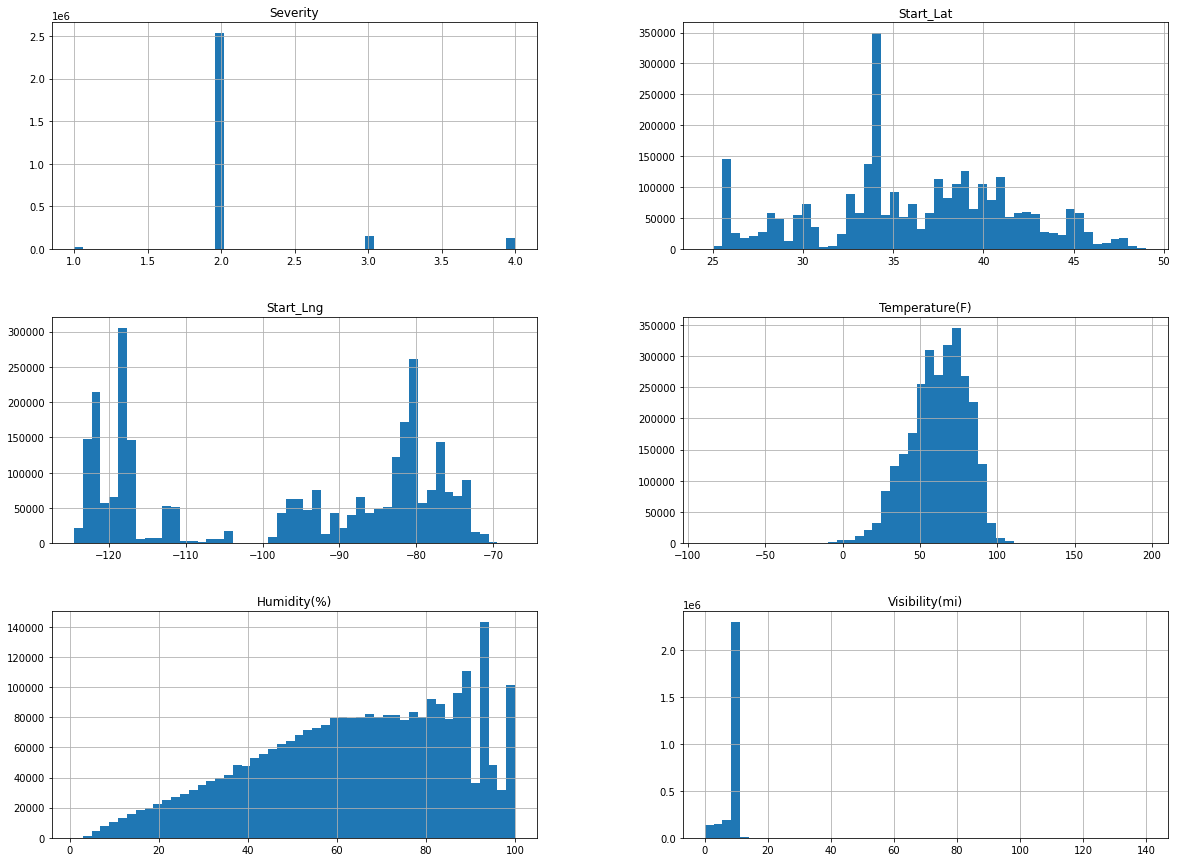

In [10]:
us_acc_drop.hist(bins=50, figsize=(20,15))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

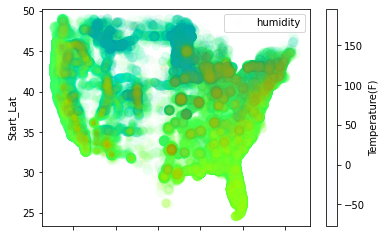

In [12]:
us_acc_drop.plot(kind='scatter',x='Start_Lng', y='Start_Lat', alpha=0.01, s= us_acc_drop['Humidity(%)']
                       , label='humidity', c='Temperature(F)',cmap=plt.get_cmap('jet'))